In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
!pip install category_encoders

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
# loading data set from csv file to a panda DatFrame
bd = pd.read_csv('Train.csv')
#bp=pd.read_csv('Test.csv')

In [4]:
# first 5 rows of data frame
bd.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# number of data points & no.of features
bd.shape


(8523, 12)

#getting information about data set
bd.info()


In [6]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features : 
Item identifier
Item fat content
Item Type
Outlet Identifier
Outlet Size
outlet location type
Outlet type

In [7]:
# checking for missing values 
bd.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values 
 Mean --- > average value
Mode ---- > Most repeated value 


In [8]:
# mean value  of item weight column
bd['Item_Weight'].mean()


12.857645184136183

In [9]:
# fiiling missing values in item weight column with "Mean" Value
bd['Item_Weight'].fillna(bd['Item_Weight'].mean(),inplace = True)

In [10]:
bd.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in "outlet_size" with mode

In [11]:
mod = bd.pivot_table(values='Outlet_Size',columns = 'Outlet_Type',aggfunc = (lambda x : x.mode()[0]))

In [12]:
print(mod)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
miss_values = bd['Outlet_Size'].isnull()
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
bd.loc[miss_values,'Outlet_Size'] = bd.loc[miss_values,'Outlet_Type'].apply(lambda x : mod[x])

In [15]:
bd.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [16]:
# statistical measures about data
bd.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [17]:
sns.set()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


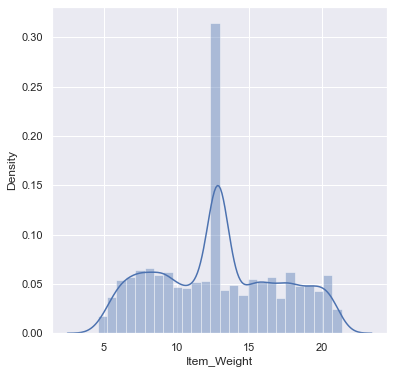

In [18]:
# Item weight distribution
plt.figure(figsize=(6,6)) # X axis and Y axis Size
sns.distplot(bd['Item_Weight'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


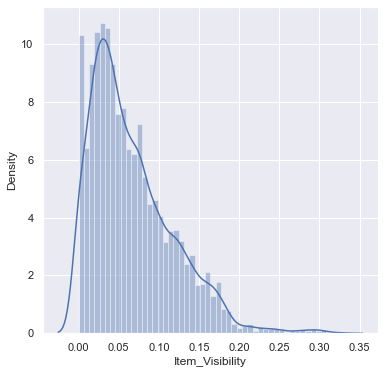

In [19]:
# Item visibility distribution
plt.figure(figsize=(6,6)) # X axis and Y axis Size
sns.distplot(bd['Item_Visibility'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


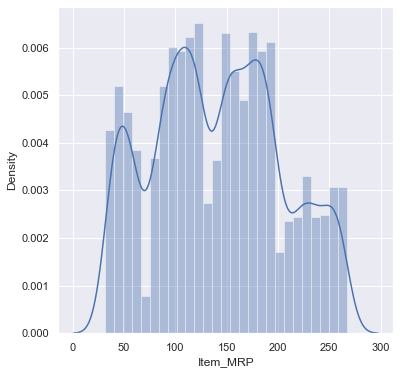

In [20]:
# Item MRP distribution
plt.figure(figsize=(6,6)) # X axis and Y axis Size
sns.distplot(bd['Item_MRP'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


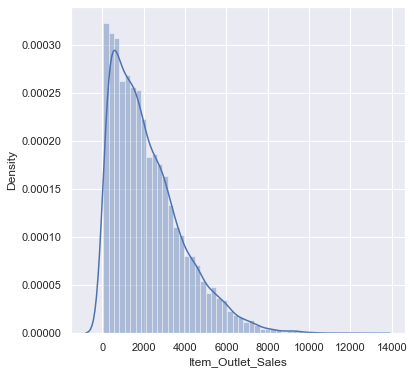

In [21]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6)) # X axis and Y axis Size
sns.distplot(bd['Item_Outlet_Sales'])
plt.show()

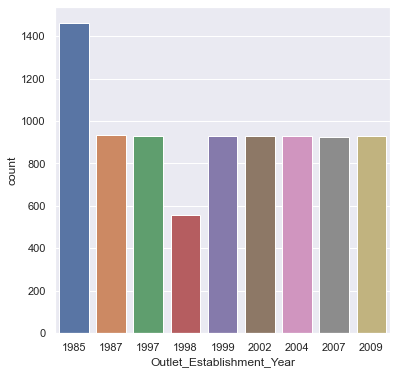

In [22]:
# outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=bd)
plt.show()

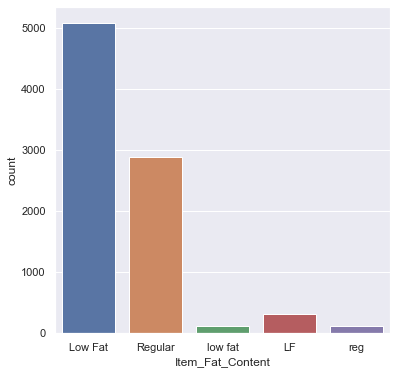

In [23]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=bd)
plt.show()

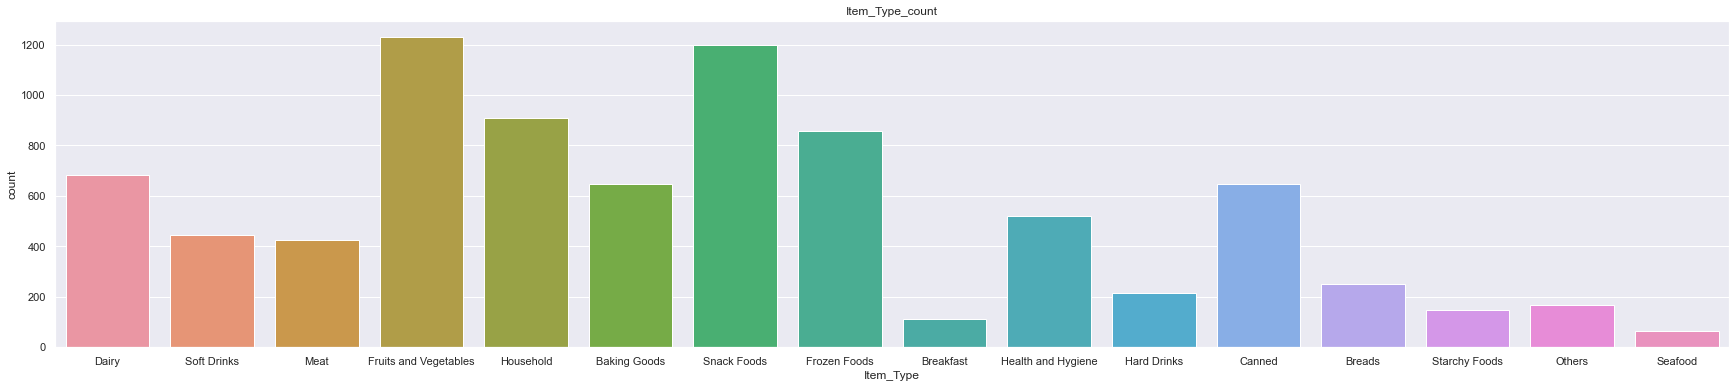

In [24]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=bd)
plt.title('Item_Type_count')
plt.show()

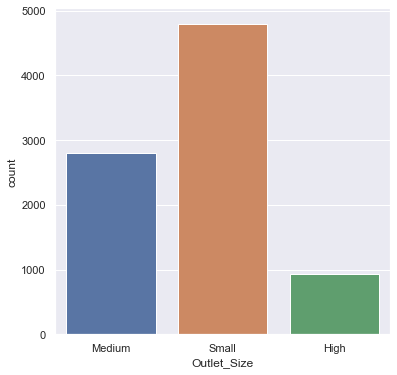

In [25]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=bd)
plt.show()

Data Preprocessing

In [26]:
bd.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
bd.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [28]:
bd['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
bd['Outlet_Establishment_Year']=2013-bd['Outlet_Establishment_Year']
bd['Outlet_Establishment_Year']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

Target encoding

In [30]:
import category_encoders as ce
encoder=ce.TargetEncoder(cols=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'] )

bd = encoder.fit_transform(bd,bd['Item_Outlet_Sales'])
bd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2879.598286,9.300,2157.711534,0.016047,2232.542597,249.8092,2348.354635,14,2681.603542,1876.909159,2316.181148,3735.1380
1,1920.354050,5.920,2224.561170,0.019278,2006.511735,48.2692,1995.498739,4,2681.603542,2279.627651,1995.498739,443.4228
2,2030.685308,17.500,2157.711534,0.016760,2158.977911,141.6180,2348.354635,14,2681.603542,1876.909159,2316.181148,2097.2700
3,2347.410648,19.200,2224.561170,0.000000,2289.009592,182.0950,339.351662,15,1867.182814,2279.627651,339.828500,732.3800
4,1879.152033,8.930,2157.711534,0.000000,2258.784300,53.8614,2298.995256,26,2298.995256,2279.627651,2316.181148,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,2424.628001,6.865,2157.711534,0.056783,2277.321739,214.5218,2298.995256,26,2298.995256,2279.627651,2316.181148,2778.3834
8519,2271.350452,8.380,2224.561170,0.046982,1952.971207,108.1570,2192.384798,11,1867.182814,2323.990559,2316.181148,549.2850
8520,1991.431370,10.600,2157.711534,0.035186,2010.000265,85.1224,2438.841866,9,1867.182814,2323.990559,2316.181148,1193.1136
8521,2158.829654,7.210,2224.561170,0.145221,2277.321739,103.1332,1995.498739,4,2681.603542,2279.627651,1995.498739,1845.5976


In [31]:
#bd['Item_Identifier'] = encoder.fit_transform(bd['Item_Identifier'])

#bd['Item_Fat_Content'] = encoder.fit_transform(bd['Item_Fat_Content'])

#bd['Item_Type'] = encoder.fit_transform(bd['Item_Type'])

#bd['Outlet_Identifier'] = encoder.fit_transform(bd['Outlet_Identifier'])

#bd['Outlet_Size'] = encoder.fit_transform(bd['Outlet_Size'])

#bd['Outlet_Location_Type'] = encoder.fit_transform(bd['Outlet_Location_Type'])

#bd['Outlet_Type'] = encoder.fit_transform(bd['Outlet_Type'])

In [32]:
bd.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2879.598286,9.30,2157.711534,0.016047,2232.542597,249.8092,2348.354635,14,2681.603542,1876.909159,2316.181148,3735.1380
1,1920.354050,5.92,2224.561170,0.019278,2006.511735,48.2692,1995.498739,4,2681.603542,2279.627651,1995.498739,443.4228
2,2030.685308,17.50,2157.711534,0.016760,2158.977911,141.6180,2348.354635,14,2681.603542,1876.909159,2316.181148,2097.2700
3,2347.410648,19.20,2224.561170,0.000000,2289.009592,182.0950,339.351662,15,1867.182814,2279.627651,339.828500,732.3800
4,1879.152033,8.93,2157.711534,0.000000,2258.784300,53.8614,2298.995256,26,2298.995256,2279.627651,2316.181148,994.7052


In [33]:
#bp.head()

In [34]:
X = bd.drop(columns='Item_Outlet_Sales',axis=1)
Y = bd['Item_Outlet_Sales']

In [35]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0         2879.598286        9.300       2157.711534         0.016047   
1         1920.354050        5.920       2224.561170         0.019278   
2         2030.685308       17.500       2157.711534         0.016760   
3         2347.410648       19.200       2224.561170         0.000000   
4         1879.152033        8.930       2157.711534         0.000000   
...               ...          ...               ...              ...   
8518      2424.628001        6.865       2157.711534         0.056783   
8519      2271.350452        8.380       2224.561170         0.046982   
8520      1991.431370       10.600       2157.711534         0.035186   
8521      2158.829654        7.210       2224.561170         0.145221   
8522      2006.850542       14.800       2157.711534         0.044878   

        Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0     2232.542597  249.8092        2348.354635

In [36]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [37]:
#splitting data into training & Test data
#random state identification number for similar splittingg
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [39]:
params = {
    'objective': 'reg:squarederror',  # use regression loss function
    'learning_rate': 0.1,  # learning rate for the optimizer
    'max_depth': 3,  # maximum depth of decision trees
    'n_estimators': 100  # number of decision trees to build
}

In [40]:
#machine learning model training
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [41]:
#training machine learning model
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
#prediction on training data
train_pred = regressor.predict(X_train,iteration_range=(0, 50))

In [43]:
# R square value
r2_train = metrics.r2_score(Y_train,train_pred)
print(r2_train)

0.8113308745434766


In [44]:
test_pred = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_pred)
print(r2_test)

0.5958182241907892


In [45]:
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

Mean absolute Error :
778.3556877256043
Mean squared Error :
1247739.3385314443


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


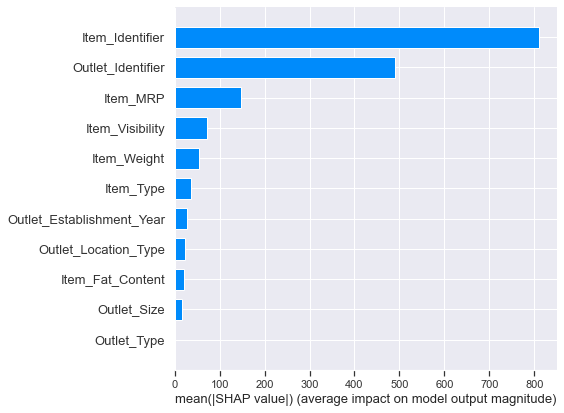

In [46]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)
regressor.fit(X_train,Y_train)
test_pred = regressor.predict(X_test)
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [48]:
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

r2 score : 
0.5960230601624916
Mean absolute Error :
774.9513254107496
Mean squared Error :
1249133.590847801


In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=2)
regressor.fit(X_train,Y_train)
test_pred = regressor.predict(X_test)
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (5113, 11) (3410, 11)


In [50]:
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

r2 score : 
0.5771717601916247
Mean absolute Error :
792.4378118190762
Mean squared Error :
1277811.8438090712


In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_reg = Ridge()
ridge_reg

Ridge()

In [52]:
#parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
#ridgecv=GridSearchCV(ridge_reg,parameters,scoring='neg_mean_squared_error',cv=5)

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
ridge_reg.fit(X_train,Y_train)
test_pred = ridge_reg.predict(X_test)
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [54]:
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

r2 score : 
0.617241288452024
Mean absolute Error :
806.6482592235652
Mean squared Error :
1181604.73862992


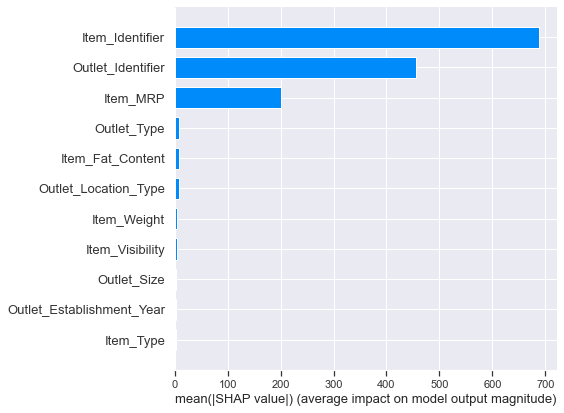

In [55]:
import shap
shap.initjs()
explainer = shap.LinearExplainer(ridge_reg,X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)
ridge_reg.fit(X_train,Y_train)
test_pred = ridge_reg.predict(X_test)
print(X.shape,X_train.shape,X_test.shape)
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

(8523, 11) (5966, 11) (2557, 11)
r2 score : 
0.6299177182857107
Mean absolute Error :
789.0126993680299
Mean squared Error :
1144328.2125283224


In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=2)
ridge_reg.fit(X_train,Y_train)
test_pred = ridge_reg.predict(X_test)
print(X.shape,X_train.shape,X_test.shape)
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

(8523, 11) (5113, 11) (3410, 11)
r2 score : 
0.6283371699684965
Mean absolute Error :
785.4928343979403
Mean squared Error :
1123186.9619992347


In [58]:
ridge_reg = Ridge(normalize=True)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
ridge_reg.fit(X_train,Y_train)
test_pred = ridge_reg.predict(X_test)
print(X.shape,X_train.shape,X_test.shape)
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

(8523, 11) (6818, 11) (1705, 11)
r2 score : 
0.5321962080532153
Mean absolute Error :
888.2547553416613
Mean squared Error :
1444145.255578544


'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 


In [59]:
import lightgbm as lgb
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test)
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=100)
test_pred = model.predict(X_test, num_iteration=model.best_iteration)
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l2: 2.89899e+06
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 2.72186e+06
[3]	valid_0's l2: 2.56192e+06
[4]	valid_0's l2: 2.41639e+06
[5]	valid_0's l2: 2.28619e+06
[6]	valid_0's l2: 2.16506e+06
[7]	valid_0's l2: 2.06003e+06
[8]	valid_0's l2: 1.96491e+06
[9]	valid_0's l2: 1.87636e+06
[10]	valid_0's l2: 1.79626e+06
[11]	valid_0's l2: 1.72504e+06
[12]	valid_0's l2: 1.66037e+06
[13]	valid_0's l2: 1.60319e+06
[14]	valid_0's l2: 1.54992e+06
[15]	valid_0's l2: 1.50387e+06
[16]	valid_0's l2: 1.46029e+06
[17]	valid_0's l2: 1.42107e+06
[18]	valid_0's l2: 1.38602e+06
[19]	valid_0's l2: 1.35419e+06
[20]	valid_0's l2: 1.32525e+06
[21]	valid_0's l2: 1.29911e+06
[22]	valid_0's l2: 1.27447e+06
[23]	valid_0's l2: 1.25268e+06
[24]	

In [60]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'objective': ['reg:squarederror', 'reg:linear', 'reg:gamma']
}
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [61]:
grid_search.fit(X_train,Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [66]:
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train, Y_train)
test_pred = xgb_model.predict(X_test)

In [67]:
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

r2 score : 
0.661881380410801
Mean absolute Error :
714.3402054120464
Mean squared Error :
1043797.4396711481


In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)
print(X.shape,X_train.shape,X_test.shape)
grid_search.fit(X_train,Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train, Y_train)
test_pred = xgb_model.predict(X_test)

(8523, 11) (5966, 11) (2557, 11)
Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [69]:
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

r2 score : 
0.67015566172196
Mean absolute Error :
701.9810817070929
Mean squared Error :
1019908.8167255082


In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=2)
print(X.shape,X_train.shape,X_test.shape)
grid_search.fit(X_train,Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train, Y_train)
test_pred = xgb_model.predict(X_test)

(8523, 11) (5113, 11) (3410, 11)
Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [71]:
r2_test = metrics.r2_score(Y_test,test_pred)
print("r2 score : ")
print(r2_test)
mean_absolute_test = metrics.mean_absolute_error(Y_test,test_pred)
print("Mean absolute Error :")
print(mean_absolute_test)
mean_squared_test = metrics.mean_squared_error(Y_test,test_pred)
print("Mean squared Error :")
print(mean_squared_test)

r2 score : 
0.6660099063728113
Mean absolute Error :
702.4421935333735
Mean squared Error :
1009337.7337926538
